# What is Clustering?
***

우리는 '국가', '직장', '학교', '가족' 등 다양한 조직에 속하게 됩니다. 동식물에게도 '포유류', '갑각류', '관엽식물' 등 다양한 '군집'이 존재합니다. 데이터 또한 그 특성들에 따라서 군집에 할당될 수 있습니다. 예를 들어 투자 관련 데이터를 기반으로 '자금은 부족하지만 투자 성향이 공격적인 집단'과 '자금은 많지만 투자 성향이 소극적인 집단', '자금도 충분하고 투자 수완도 좋은 집단' 등 구하는 군집 수에 따라 다양한 군집이 형성될 수 있습니다. 이처럼 군집화는 데이터의 레이블이 없는 상태에서 사용되기 때문에 비지도학습의 대표적인 기술입니다.

***

그 중에서 K-평균 알고리즘은 군집화에서 가장 일반적으로 사용됩니다. K-평균은 군집 중심점을 임의로 설정하고 해당 중심에 가장 가까운 데이터들을 선택하게 됩니다. K-평균의 작동 방식을 간단하게 설명드리겠습니다.
***

1. 데이터에서 임의로 데이터를 추출하고 각 군집의 중심점으로 설정(초기값)

2. 데이터들과 각 군집의 중심점과의 거리를 계산하여 가장 가까운 중심점의 군집에 데이터를 할당

3. 할당된 데이터들을 포함하여 군집의 중심점 재계산

4. 재할당한 군집과 이전에 설정한 군집을 비교하고 데이터들의 할당된 군집이 고정될 때까지 2번, 3번 과정 반복

***

K-평균의 장점과 단점은 다음과 같습니다. 

<장점>
- 군집화중에서 가장 일반적으로 사용되며 구현이 쉬움.
- 쉽고 간결한 알고리즘

<단점>
- 거리 기반 방식으로 데이터가 매우 많거나 feature 수가 매우 많아질 경우 군집화 성능이 저하 될 수 있다.
- 재계산 과정이 반복되기 때문에 수행시간이 매우 느려질 수 있다.
- 군집의 개수를 사용자가 직접 정해야하는 어려움이 있다.


In [30]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.DataFrame(data=load_iris().data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
km = KMeans(n_clusters = 5, random_state = 112) # sklearn의 kmeans 알고리즘 이용

In [32]:
km.fit(df) # 데이터를 학습

KMeans(n_clusters=5, random_state=112)

In [33]:
km.labels_ # 할당된 군집 레이블 확인

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1,
       1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2, 1, 4, 2, 2, 4, 3, 4, 2, 4,
       2, 2, 2, 1, 2, 2, 2, 4, 4, 1, 2, 1, 4, 1, 2, 4, 1, 1, 2, 4, 4, 4,
       2, 1, 1, 4, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [34]:
df['TARGET'] = load_iris().target # data 레이블
df['cluster'] = km.labels_ # data 클러스터

In [35]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,TARGET,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


#### 간단한 시각화를 통해서 군집이 어떻게 형성되었는지 살펴보겠습니다.

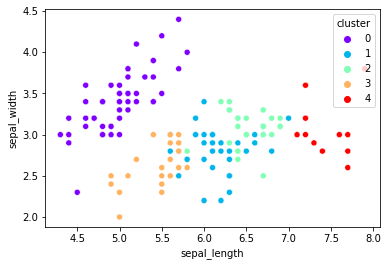

In [26]:
sns.scatterplot(df.sepal_length, df.sepal_width, hue = 'cluster', data = df, palette = 'rainbow')
plt.show()

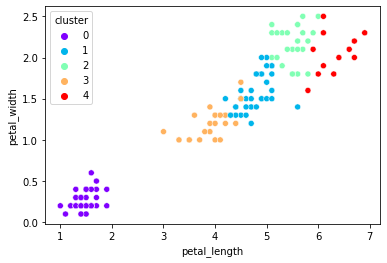

In [27]:
sns.scatterplot(df.petal_length, df.petal_width, hue = 'cluster', data = df, palette = 'rainbow')
plt.show()

지금까지 **K-Means**를 활용하여 간단하게 군집화를 해보았습니다. 군집화는 비지도학습의 일종으로 정답 레이블이 없기 때문에 기존의 평가 방법을 활용할 수 없는데요. 다음 챕터에서는 이를 위해 사용되는 평가 방법중 대표적인 방법인 **실루엣 분석**에 대해서 알아보도록 하겠습니다.